## Multilabel Image Classifier:
### Training a convolutional neural network - ConvNet, CNN - from scratch
Having to train your own image-classification model instead of using a pretrained one is a good skill to have. You simply do your best with what little data you have available. Here I demonstrate an example with the CIFAR-10 dataset, already available in Keras. The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research.The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. In Keras it's already divided into a train and test set with 50.000 and 10.000 images in each, allowing you to go straight into building your model! <br><br>
Here a sample of what the data looks like:

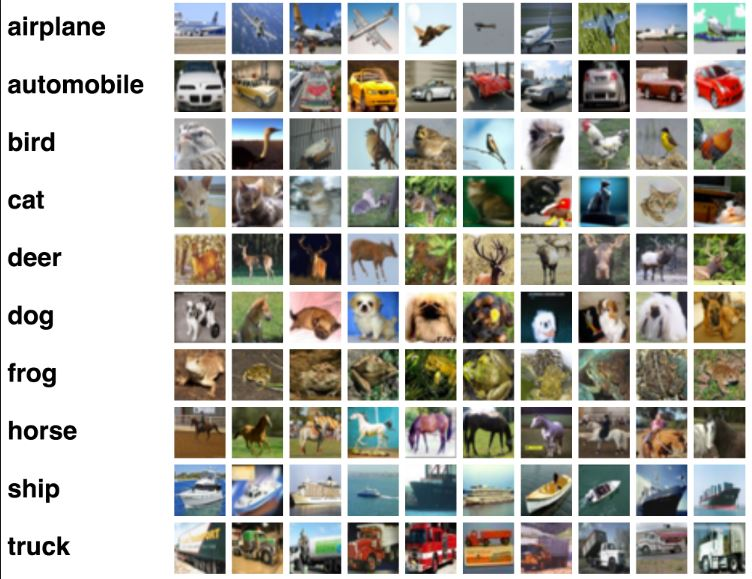

In [1]:
from IPython.display import Image
Image(filename="C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/DeepLearning/DeepLearning_Keras/ConvNet basics/Training a ConvNet from scratch/Cifar10sample.JPG" ,width=600, height= 200)
# Replaced the Markdown code -- ![alt text](Cifar10sample.jpg ) -- with the above!

Downloading the necessary libraries.

In [2]:
import numpy as np 
import pandas as pd
import keras

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
import matplotlib.pyplot as plt

Using TensorFlow backend.


And the data itself:

In [3]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 69s 0us/step


### Data preprocessing
Data, currently as JPEG-files, must be formatted into appropriately preprocessed floating-point tensors before being fed into te network above. Fortunately with CIFAR-10 Keras has utilities to make these steps more automated.

In [4]:
#Normalizing the input data
x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
#Creating the y labels
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

### Building the network
Because this is a multilabel-classification problem with 10 classes, the network needs to end with a Dense layer of equal size, i.e. 10, and a softmax activation. 

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Let's look how the dimensions of the feature maps change with every successive layer:

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

For the compilation step the RMSprop optimizer is used, to speed up the learning. It divides the learning rate for a weight	 by a running average of the magnitudes of recent gradients for that weight. In simple terms, it sort of smoothens out the gradient descent (green line in the picture towards the goal compared to not using an optimizer, blue line). Other available optimizers include e.g. Adam, and AdaGrad.

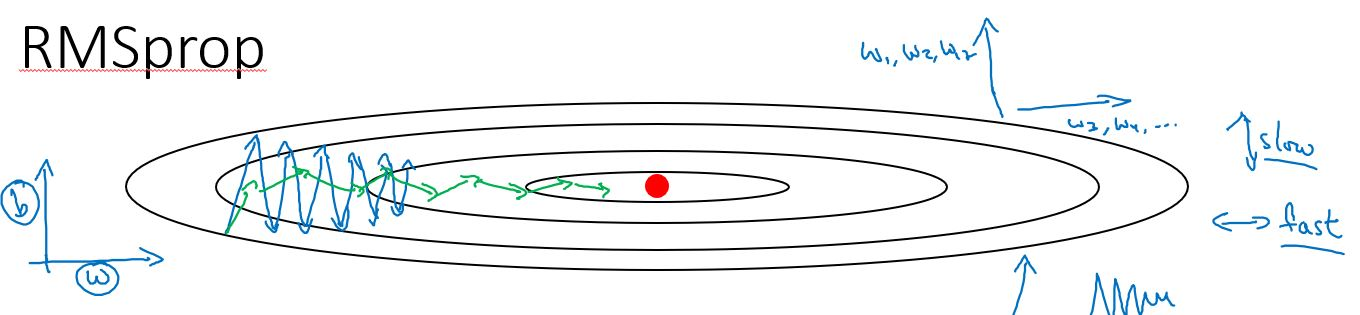

In [2]:
from IPython.display import Image
Image(filename="C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/DeepLearning/DeepLearning_Keras/ConvNet basics/Training a ConvNet from scratch/RMSprop.JPG" ,width=800, height= 300)

In [7]:
history = model.fit(x_train, y_train,batch_size=32 ,epochs=50, validation_data=(x_test, y_test),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 52s 1ms/step - loss: 1.8104 - acc: 0.3391 - val_loss: 1.6231 - val_acc: 0.4084
Epoch 2/50
50000/50000 [==============================] - 19s 374us/step - loss: 1.4959 - acc: 0.4571 - val_loss: 1.4589 - val_acc: 0.4680
Epoch 3/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.3573 - acc: 0.5135 - val_loss: 1.2272 - val_acc: 0.5645
Epoch 4/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.2461 - acc: 0.5601 - val_loss: 1.1679 - val_acc: 0.5843
Epoch 5/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.1641 - acc: 0.5918 - val_loss: 1.0566 - val_acc: 0.6295
Epoch 6/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.0973 - acc: 0.6150 - val_loss: 1.0288 - val_acc: 0.6343
Epoch 7/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.0421 - acc: 0.6339 - val_loss: 0.96

Next, plotting the loss and accuracy:

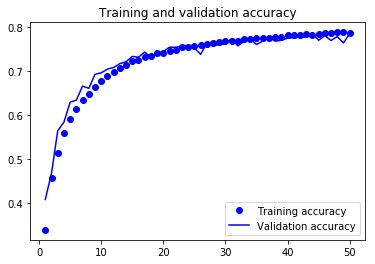

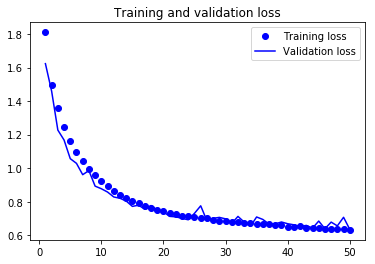

In [8]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1 )

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

The outcome turns out pretty good. No overfitting; the gap between traing and validation data diminishes clearly. The overall accuracy reaches closer to 80%; the model recognizes the correct image class on average in 4 out of 5 examples. 